<a href="https://colab.research.google.com/github/Abhi311509/Rice-Leaf-Detection/blob/main/Rice_Leaf_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Rice Leaf Disease Detection**

##**Business Case:** This dataset contains 119 jpg images of disease-infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in Bacterial Leaf Blight and Brown Spot.There are 39 images in Leaf Smut.

Classes
●Leaf smut
●Brown spot
●Bacterial leaf blight

Rice is amongst the majorly cultivated crops in India and its leaf diseases can have
a substantial impact on output and quality. The most important component is identifying rice
leaf diseases, which have a direct impact on the economy and food security. **Brown spot, Leaf**
**Smut, Bacterial Leaf Blight**  are the most frequently occurring rice leaf diseases. To resolve this issue, we
have studied various machine learning and deep learning approaches for detecting the
diseases on their leaves by calculating their accuracy, recall, and precision to measure the
performance. This study helps the farmers by detecting the diseases in rice leaves in order to
get a healthy crop yield. The deep learning models perform well when compared with the
machine learning methods.

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Task 1:-Prepare a complete data analysis report on the given data.

##Here, we are importing the required essential libraries.

In [32]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np

## Creating function to read image data from drive.

In [33]:
labels = ['Bacterial Leaf Blight', 'Brown Spot','Leaf Smut']
img_size = 200
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

## Reading train and test data which has split in drive.

In [34]:
train=get_data('/content/drive/MyDrive/Internships/PRCP-1001-RiceLeaf/data2/train')
val=get_data('/content/drive/MyDrive/Internships/PRCP-1001-RiceLeaf/data2/test')

<ipython-input-33-2525b634acce>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


## We are converting train and test data into array format and reshaping the image size.

In [35]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [36]:
x_train.shape

(105, 200, 200, 3)

## We have used to_categorical to Converts a class vector (integers) to binary class matrix.

In [37]:
y_train = to_categorical(y_train)
y_train.shape

(105, 3)

In [38]:
y_val=to_categorical(y_val)
y_val.shape

(14, 3)

##Task3:- Analyze various techniques like Data Augmentation, etc and create a report on that.

##The ImageDataGenerator class allows your model to receive new variations of the images at each epoch.

In [39]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)


##Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

## Model Architecture

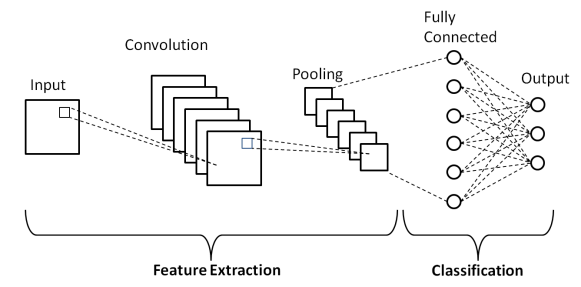

In [40]:
#Initialize the model
model =Sequential()

# the shape of the data is (300,300,3) but use X.shape[1:] to get this value dynamically
model.add(Conv2D(32,kernel_size=(3, 3),input_shape=(200,200,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))  #pool_size the window size over which to take the maximum,

model.add(Conv2D(64,kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dense(3,activation='softmax'))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 64)      

## Compiling the Model by giving Learning Rate,Optimizers and Loss Parameters.

In [42]:
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

## Creating Custom Callback Function to monitor Validation Score

In [43]:
class CustomCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs=None):
        if logs.get('val_accuracy')>=0.80:
            self.model.stop_training = True

stop_early = CustomCallBack()

## Model Fitting

In [44]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer ='adam',
              metrics =['accuracy'])

history = model.fit(x_train,y_train,steps_per_epoch=4, epochs=50,validation_data=(x_val,y_val),callbacks=[stop_early])

Epoch 1/50
4/4 [==============================] - 12s 2s/step - loss: 1.6982 - accuracy: 0.3619 - val_loss: 1.1380 - val_accuracy: 0.2857
Epoch 2/50
4/4 [==============================] - 11s 3s/step - loss: 1.0990 - accuracy: 0.3143 - val_loss: 1.1783 - val_accuracy: 0.2857
Epoch 3/50
4/4 [==============================] - 10s 3s/step - loss: 1.0921 - accuracy: 0.4381 - val_loss: 0.9824 - val_accuracy: 0.6429
Epoch 4/50
4/4 [==============================] - 9s 2s/step - loss: 1.0606 - accuracy: 0.3619 - val_loss: 0.8912 - val_accuracy: 0.6429
Epoch 5/50
4/4 [==============================] - 11s 3s/step - loss: 1.0191 - accuracy: 0.4952 - val_loss: 0.8231 - val_accuracy: 0.6429
Epoch 6/50
4/4 [==============================] - 10s 3s/step - loss: 0.9560 - accuracy: 0.5238 - val_loss: 0.7807 - val_accuracy: 0.7143
Epoch 7/50
4/4 [==============================] - 9s 2s/step - loss: 0.8851 - accuracy: 0.5429 - val_loss: 0.7638 - val_accuracy: 0.7143
Epoch 8/50
4/4 [====================

## Plotting the graph by Accuracy and Loss.

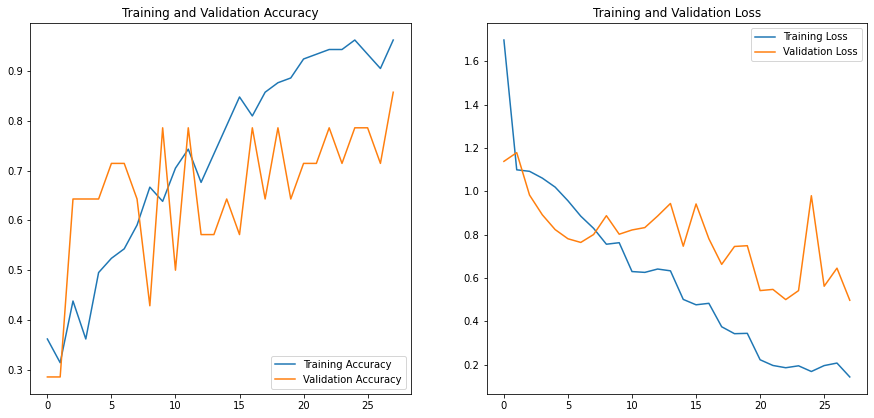

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(28)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [47]:
# get predictions on the test set
y_hat = model.predict(x_val)

labels = ['Bacterial Leaf Blight', 'Brown Spot','Leaf Smut']

1/1 [==============================] - 0s 420ms/step


## Predicting Probabilities.

In [48]:
X_new = x_val
y_new = y_val
y_proba = model.predict(X_new)
y_proba
y_proba.round(2)

1/1 [==============================] - 0s 331ms/step


array([[1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.81, 0.11, 0.08],
       [1.  , 0.  , 0.  ],
       [0.  , 0.28, 0.71],
       [0.  , 0.59, 0.41],
       [0.  , 0.98, 0.02],
       [0.  , 1.  , 0.  ],
       [0.  , 0.93, 0.07],
       [0.  , 0.4 , 0.59],
       [0.  , 0.05, 0.95],
       [0.08, 0.89, 0.04],
       [0.33, 0.3 , 0.37]], dtype=float32)

In [49]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred, y_new

(array([0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 2]), array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]], dtype=float32))

In [51]:
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
img = tf.keras.utils.load_img("/content/leaf smut typical sym (1).jpg", target_size=(200,200,3)
)
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions
score1=np.argmax(score, axis=-1)
score1

1/1 [==============================] - 0s 48ms/step


array([1])

## Evaluating the Model

In [52]:
score = model.evaluate(x_val, y_val, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 85.7143%


In [72]:
test_loss, test_acc = model.evaluate(x_val,y_val,verbose=2)

1/1 - 0s - loss: 0.4969 - accuracy: 0.8571 - 497ms/epoch - 497ms/step


In [53]:
predictions = model.predict(x_val)
predictions[1]

1/1 [==============================] - 0s 301ms/step


array([9.9367428e-01, 6.0313032e-03, 2.9433874e-04], dtype=float32)

## Classification Report

In [54]:
y_predict = np.argmax(predictions,axis=1)
y_true = np.argmax(y_val,axis=1)
print(classification_report(y_true,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.75      0.75      0.75         4

    accuracy                           0.86        14
   macro avg       0.85      0.85      0.85        14
weighted avg       0.86      0.86      0.86        14



In [55]:
y_hat = model.predict(x_val)
Rice_labels= ['Leaf Smut','Bacterial Leaf Blight','Brown Spot']

1/1 [==============================] - 0s 311ms/step


## Image Predictions

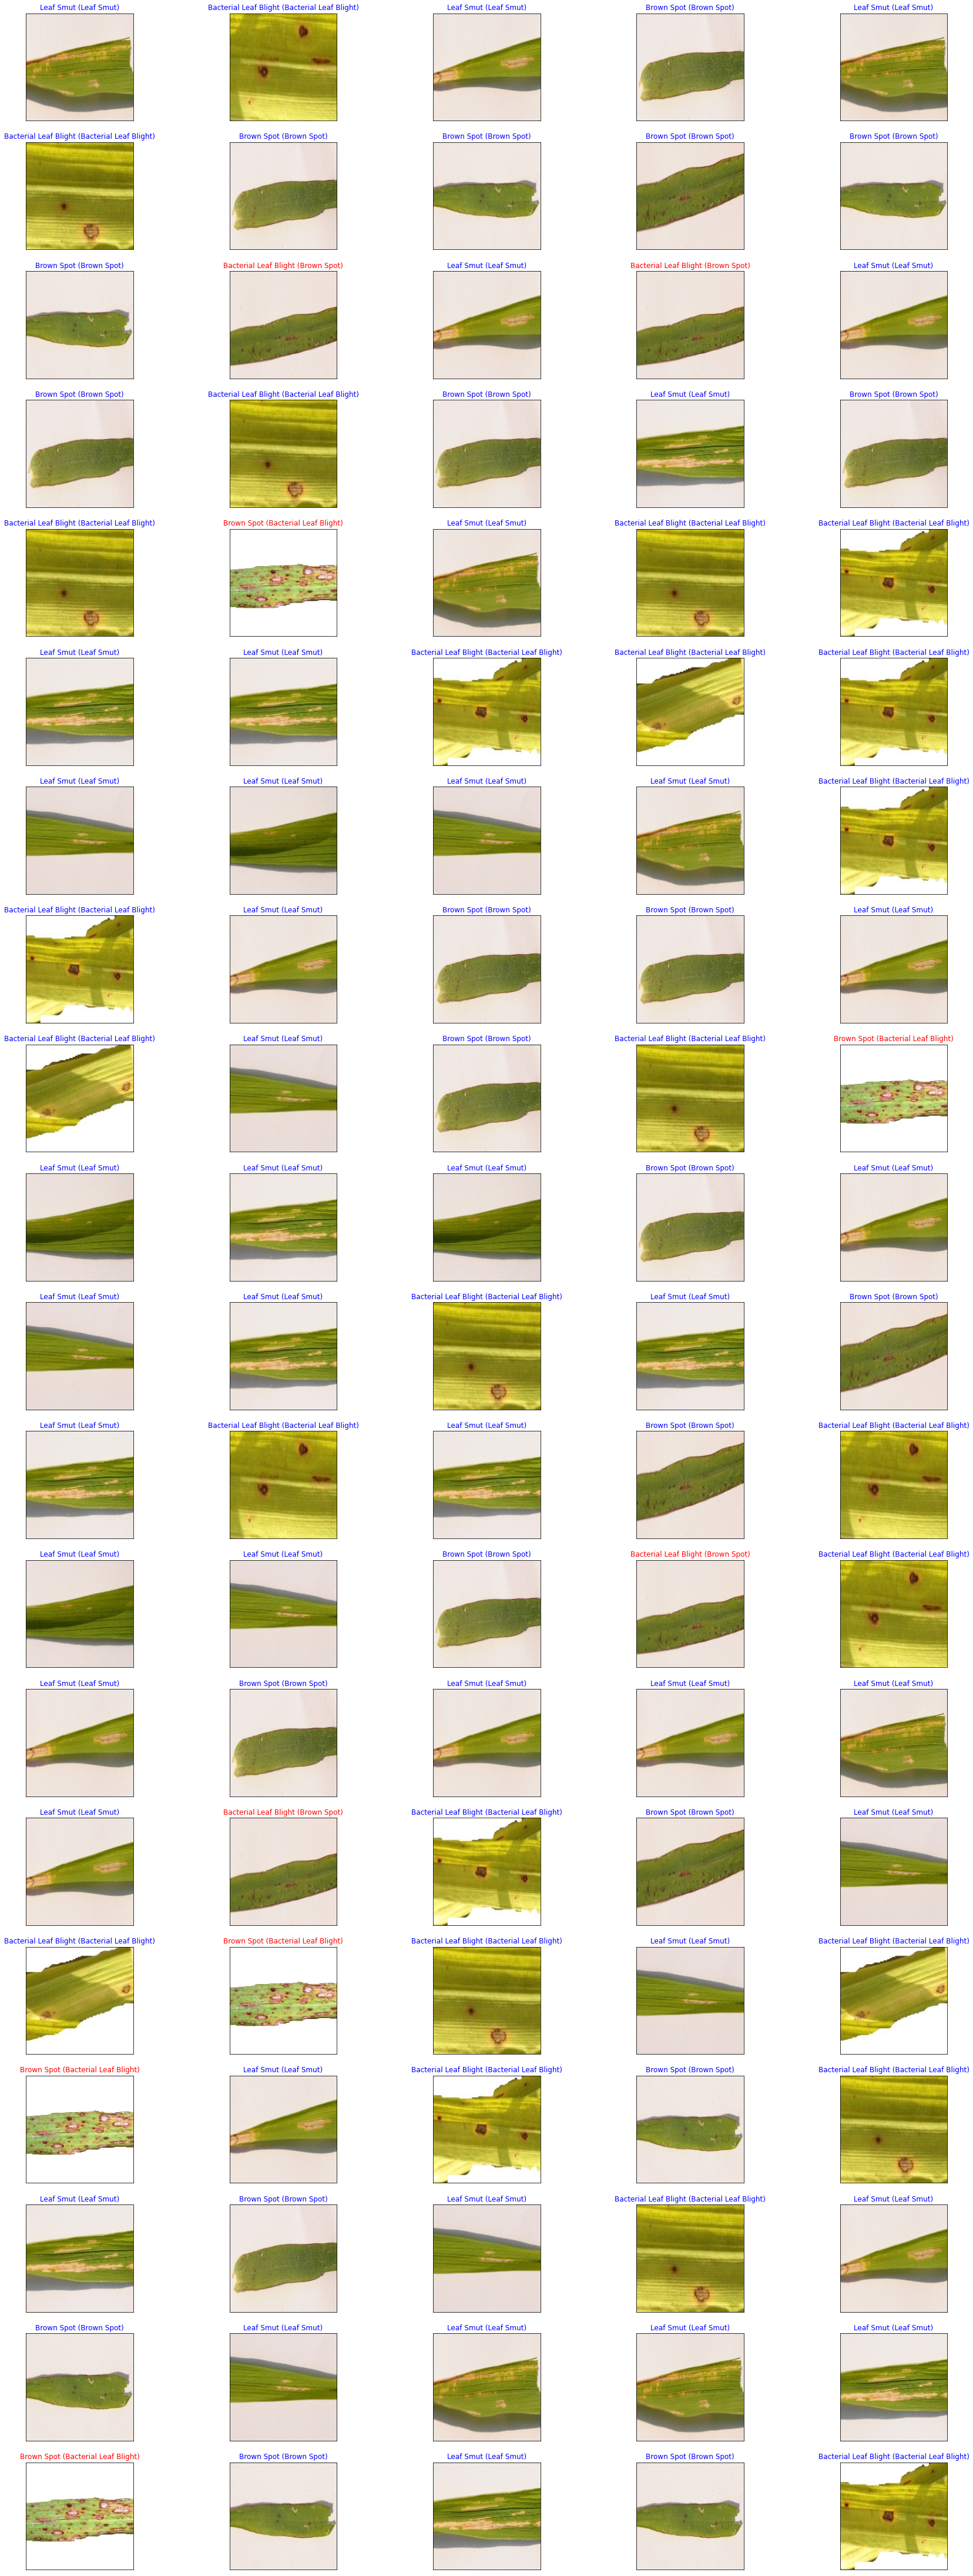

In [74]:
fig = plt.figure(figsize=(30, 80))
for i, idx in enumerate(np.random.choice(x_val.shape[0], size=100)):
    ax = fig.add_subplot(20, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_val[idx])
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_val[idx])
    ax.set_title("{} ({})".format(Rice_labels[pred_idx], Rice_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

#Hyperparameter tuning with the Keras tuner

In [59]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.7 MB/s eta 0:00:00


In [60]:
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch, Hyperband

In [61]:
# Create a hyper model

def create_model(hp):
    model = Sequential()
    conv_1 = hp.Int('conv_1',min_value=32, max_value=512, step=32)
    conv_2 = hp.Int('conv_2',min_value=32, max_value=512, step=32)
    conv_3 = hp.Int('conv_3',min_value=32, max_value=512, step=32)
    
    model.add(Conv2D(filters=conv_1,kernel_size=3,activation='relu',input_shape =(200,200,3)))
    model.add(Conv2D(filters=conv_2,kernel_size=3,activation='relu'))
    model.add(Conv2D(filters=conv_3,kernel_size=3,activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(3,activation='softmax'))
    l_r = hp.Choice('learning_rate', values=[1e-2,1e-3,1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=l_r),
                  loss=tf.keras.losses.categorical_crossentropy,
                  metrics=['accuracy'])
    return model

In [62]:
# Instantiate the tuner

tuner=RandomSearch(create_model,objective='val_accuracy',max_trials=3,seed = 1,directory='output',project_name="Rice_Leaf_Disesase Detection")

In [63]:
# Create callback to stop training early
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,mode='min',restore_best_weights=True)

In [64]:
tuner.search(x_train,y_train,epochs=5,steps_per_epoch=3,validation_data=(x_val,y_val),callbacks = [early_stop])

Trial 3 Complete [01h 09m 25s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.6428571343421936
Total elapsed time: 03h 30m 19s


In [65]:
tuner.results_summary()

Results summary
Results in output/Rice_Leaf_Disesase Detection
Showing 10 best trials
Trial summary
Hyperparameters:
conv_1: 256
conv_2: 320
conv_3: 256
learning_rate: 0.001
Score: 0.6428571343421936
Trial summary
Hyperparameters:
conv_1: 96
conv_2: 512
conv_3: 128
learning_rate: 0.01
Score: 0.3571428656578064
Trial summary
Hyperparameters:
conv_1: 320
conv_2: 416
conv_3: 192
learning_rate: 0.01
Score: 0.3571428656578064


In [66]:
best_model=tuner.get_best_models(num_models=1)[0]

## Finding the Accuracy and Loss for RandomSearch Hyperparameter

In [68]:
loss_rs, accuracy_rs = best_model.evaluate(x_val,y_val)

1/1 [==============================] - 32s 32s/step - loss: 0.9244 - accuracy: 0.6429


##Model Comparison Report

##Create a report stating the performance of multiple models on this data and suggest the best model for production.

In [73]:
import pandas as pd
result=pd.DataFrame([[test_loss,test_acc],[loss_rs,accuracy_rs]],columns=['Loss','Accuracy'],index=['Base Model','RandomSearch hp'])
result

Loss  Accuracy
Base Model       0.496872  0.857143
RandomSearch hp  0.924356  0.642857

##Report on Challenges faced

1. Creating function to read image data from drive.
2. Analysing ImageDataGenerator
3. Training of model takes more time.
4. Splitting the data correctly into training and testing.
5. Evaluating the Model.
6. Applying HyperParameters for our data and evaluating it was one of the big challenge. 

#Conclusion

##We have achieved an Accuracy of 86% for our Base Model and 64% for RandomSearch HyperParameter Tuning.
##So, we suggest that our CNN Base Model fits the dataset.